In [1]:
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_virtual_device_configuration(
    gpu,
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4000)])

2022-02-08 09:44:47.609991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 09:44:47.619505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 09:44:47.620132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [10]:
np.random.seed(123)
x = np.linspace(-1, 1, 100)
y = x ** 2 + 1.5 * x + 0.5 * (2 * np.random.rand(len(x))-1)

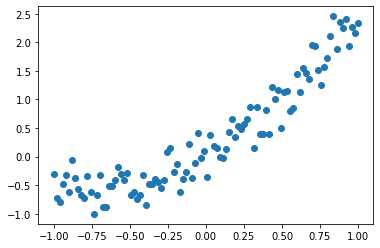

In [11]:
plt.plot( x, y, 'o')

In [12]:
x = tf.constant(x, dtype=tf.float64)
y = tf.constant(y, dtype=tf.float64)

In [13]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_dim=1) )

# 최적화 옵션
model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [14]:
hist = model.fit(x, y, epochs=2000, verbose=0)

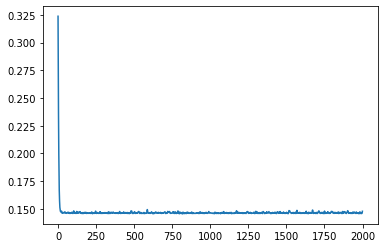

In [16]:
plt.plot(hist.history['loss'])

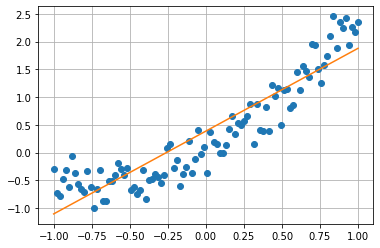

In [17]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

### keras with Neural Network

In [18]:
model = tf.keras.models.Sequential()

# hidden layer
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))

# hidden layer
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )

# output layer
model.add( tf.keras.layers.Dense(1) )

# 최적화 옵션
model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [21]:
hist = model.fit(x, y, epochs=10000, verbose=0)

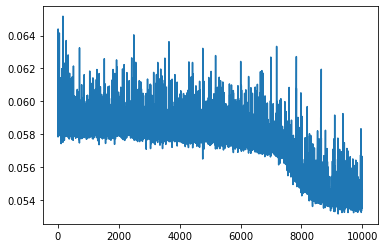

In [22]:
plt.plot(hist.history['loss'])

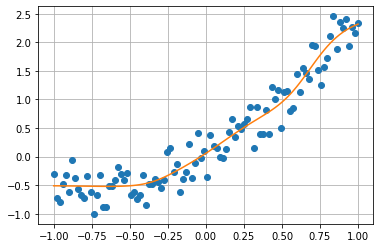

In [20]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

## 과적합

In [25]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )
model.add( tf.keras.layers.Dense(1) )

model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [26]:
hist = model.fit(x, y, epochs=100000, verbose=0)

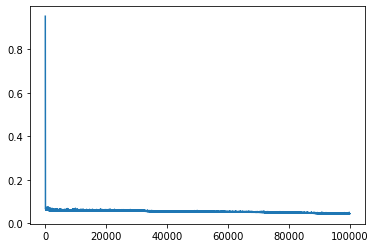

In [27]:
plt.plot(hist.history['loss'])

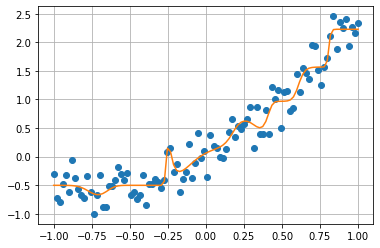

In [28]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

## DropOut
- 네트워크에 사용된 일부 노드를 삭제하는 방법
  - 어떤 노드가 삭제될지는 랜덤하게 선택
  - 해당 레이어에서 얼만큼의 비율로 노드를 삭제할지만 정하면 됩니다.
- 케라스는 DropOut 역시 하나의 레이어로 간주를 합니다.
  - DropOut 레이어를 추가하는 것으로 DropOut을 구현

In [29]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))
model.add( tf.keras.layers.Dropout(0.5) )
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )
model.add( tf.keras.layers.Dense(1) )

model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [30]:
hist = model.fit(x, y, epochs=100000, verbose=0)

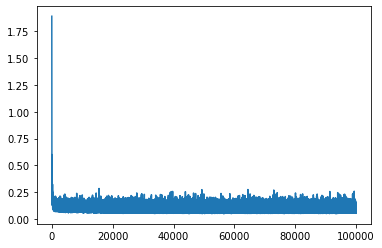

In [31]:
plt.plot(hist.history['loss'])

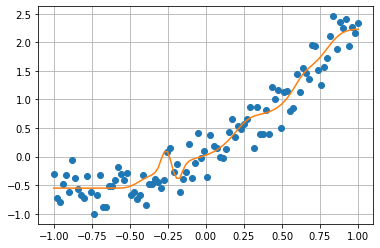

In [32]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

In [33]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 57.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 31.9 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5561ea7b6fed41a247c188af479a04d69d8507e7d9f6240013e9cdef430df667
  Stored in directory: /home/lab11/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


# 분류 모형에서의 Neural Network
- 샘플을 생성해서 모델을 만들고 결과를 시각적으로 확인

In [35]:
from sklearn.datasets import make_blobs

In [36]:
x, y = make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)

y %= 2

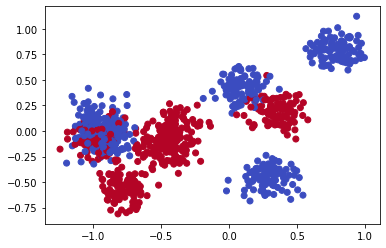

In [37]:
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

## 네트워크 구성
- 네트워크를 구성하는 방법은 동일
- 손실함수에 대한 정의
  - [Tensorflow 2 losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses?hl=ko)

- 평가방법
  - Accuracy, f1-score, Roc_score
  - [Tensorflow 2 metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics?hl=ko)

## 학습
- batch_size
  - 일반적으로 딥러닝 같은 경우 자료의 크기가 매우 큰 경우가 더 많습니다.
  - 큰 자료를 한번에 최적화 하려면 시간이 오래 걸리기 때문에, 자료를 나눠서 최적화를 진행(호불호)
  - 수학적으로 증명되지는 않았지만, 
  - 실험적으로는 자료를 나눠서 최적화를 해도 손실을 최소화 하는 방향으로 진행이 가능함이 알려져 있습니다.

In [38]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(x.shape[1],)) )
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )

model.compile(
  loss='log_cosh', 
  metrics = ['accuracy'],
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [39]:
hist = model.fit( x, y, epochs=1000, verbose=0)

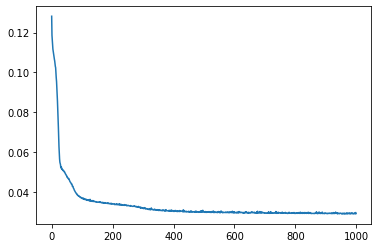

In [40]:
plt.plot(hist.history['loss'])

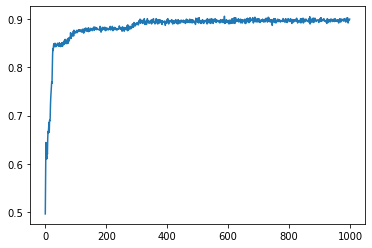

In [41]:
plt.plot(hist.history['accuracy'])

In [42]:
def contours2D(model, x1, x2, h=0.01, **params):
    xx1, xx2 = np.meshgrid(
      np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
      np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
    )

    y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
    y = y.reshape(xx1.shape)
    result = plt.contourf(xx1, xx2, y, **params)
    return result

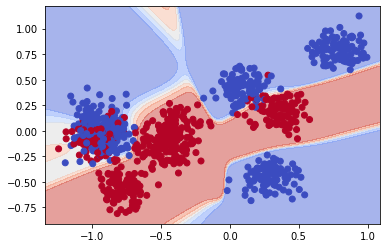

In [43]:
contours2D( model, x[:, 0], x[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

In [49]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(16, activation='relu', input_shape=(x.shape[1],)) )
model.add( tf.keras.layers.Dense(4, activation='relu') )
model.add( tf.keras.layers.Dense(1, activation='relu') )

model.compile(
  loss='log_cosh', 
  metrics = ['accuracy'],
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [50]:
hist = model.fit( x, y, epochs=1000, verbose=0)

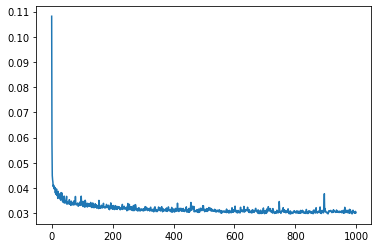

In [51]:
plt.plot( hist.history['loss'])

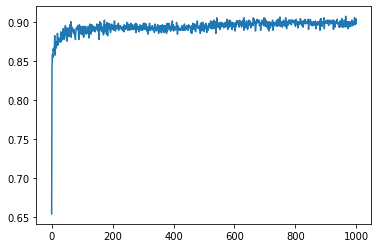

In [52]:
plt.plot( hist.history['accuracy'])

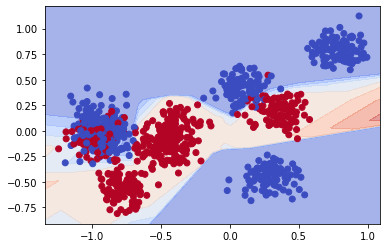

In [53]:
contours2D( model, x[:, 0], x[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')